<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99/clustering_pratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Pratice

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generate data

In [31]:
#랜덤으로 형성된 데이터
k = 3
points = [np.random.randn(k) for _ in range(50)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(50)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(50)])

points = np.array(points)

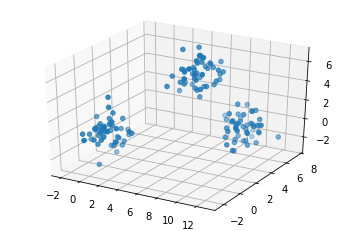

In [32]:
fig = plt.figure()
ax = fig.gca(projection = "3d")
X = points[: ,0]
Y = points[: ,1]
Z = points[:, 2]

ax.scatter(X,Y,Z)
plt.show()

### K-mean Algorithm


In [37]:
#레이블 형성
def assign(point , centroids , k): 
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))

def compute_centroids(assignments , points , k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  for i , p in zip(assignments , points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i] / counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]


def kmean(k , points):
  prev_assignment = []
  #1. 임의의 k개의 점을 중심으로 선택함
  centroids = points[np.random.choice(points.shape[0],replace = True , size = k)] #리스트에 np.array값을 주면 해당 컬럼에 해당하는 요소가 반환된다 
  for each in range(10):
    #각 점이 할당될 중심점을 계산
    assignment = [assign(i , centroids , k )for i in points]
    # 새로운 중심점을 게산
    centroids = compute_centroids(assignment, points, k)
    #만약 변화가 없다면 종료한다.
    if prev_assignment == assignment:
      break
    else:
      prev_assignment = assignment
  return assignment , centroids

assignments , centroids= kmean(k , points)

### Test

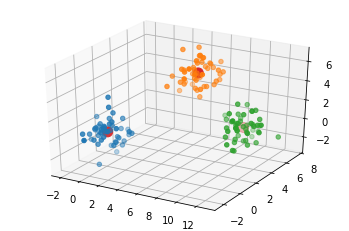

In [38]:
fig = plt.figure()
ax = fig.gca(projection = "3d")
clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
 clusters[a].append(p)
for cluster in clusters:
 ax.scatter(*zip(*cluster))
ax.scatter(*zip(*centroids), s=100)
plt.show()

## Clustering with Image File

### Image load

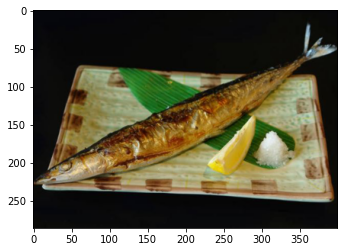

In [95]:
from PIL import Image

im = Image.open("/content/drive/MyDrive/국민대/데이터과학/Data/꽁치.JPG")
width = 400
height = im.height*width //im.width
im = im.resize((width , height))

plt.imshow(im)
plt.show()

### Image process

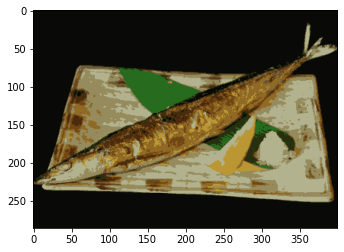

In [96]:
pixels = np.array(im).reshape(-1,3) # 286 x 400 x 3 ->  114400 x 3
assignments , centroids = kmean(10 , pixels)

for a,i in zip(assignments , range(pixels.shape[0])):
  pixels[i] = centroids[a]

change_image = Image.fromarray(pixels.reshape(height , width , 3) , 'RGB')
plt.imshow(change_image)
plt.show()

## K-means using sklearn

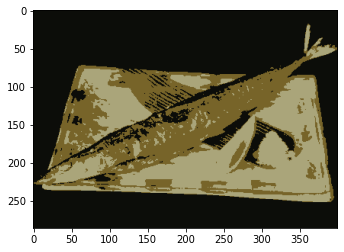

In [108]:
from sklearn.cluster import KMeans
pixels = np.array(im).reshape(-1,3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(pixels)
for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
 pixels[i] = kmeans.cluster_centers_[a]
change_image2 = Image.fromarray(pixels.reshape(height , width , 3) , 'RGB')
plt.imshow(change_image2)
plt.show()

### Inertia 

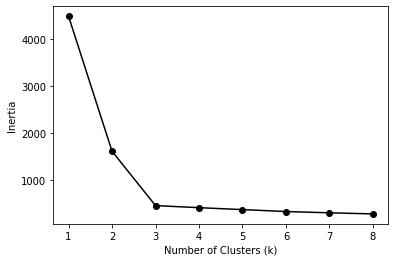

In [110]:
# 그룹에 포함된 데이터들이 퍼져있는 정도를 inertia라고 하는데, inertia는 각 클러스터의 centroids와 각 데이터들 사이의거리를 나타낸다
# 즉, inertia 가 낮은 그룹을 좋은 그룹이라고 할 수 있다.

samples = points

num_clusters = list(range(1, 9))
inertias = []

for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o' , color = 'black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()